# Capítulo 6: Intro a LP en Pyomo (Parte II)

## Qué es un modelo matemático...???

Transcribir un problema del lenguaje cotidiano al lenguaje matemático.

### Qué es un modelo de optimización ...???

Existen diferentes tipos de problemas, y por lo tanto, diferentes modelos matemáticos. En este curso nos interesan los modelos de optimización lineal entera.

<div>
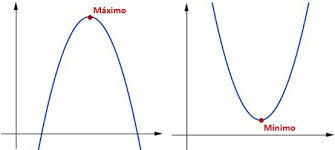
</div>

**Ejemplo:**
Intentar encontrar la solución óptima del siguiente problema:

$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$

Pudiste encontrar la solución... ??? 

Igualamos los sistemas
$$
\left\{ \begin{array}{l}
x = 5 - 2y \\
4x + y = 6
\end{array} \right.
$$
Resolvemos el sistema lineal
$$
6 = 4(5-2y) + y = 20 - 7 y
$$
equivalentemente,
$$
y = 14/7 = 2 \quad \Longrightarrow \quad x = 5 - 2(2) = 1.
$$
Por lo tanto, la solución del problema es: $x+y = 1 + 2 = 3$.

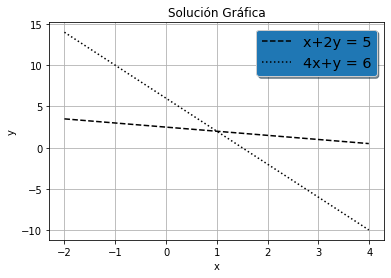

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
x1 = np.arange(-2.0, 4.0, 0.01)
y1 = (5 - x1)/2

x2 = np.arange(-2.0, 4.0, 0.01)
y2 = 6 - 4*x2

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x1, y1, 'k--', label='x+2y = 5')
ax.plot(x2, y2, 'k:', label='4x+y = 6')
ax.grid()
ax.set(xlabel='x', ylabel='y',
       title='Solución Gráfica')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

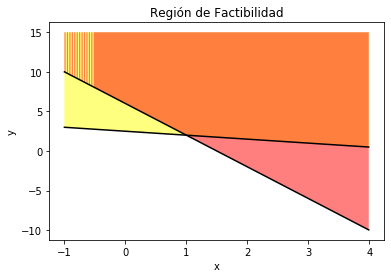

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1.0, 4.0, 0.01)
y1 = (5 - x)/2
y2 = 6 - 4*x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')

ax.fill_between(x, y1, 15, where=(x + 2*y1 >= 5), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y2, 15, where=(4*x + y2 >= 6), facecolor='red', alpha=0.5)

ax.set(xlabel='x', ylabel='y', title='Región de Factibilidad')

plt.show()

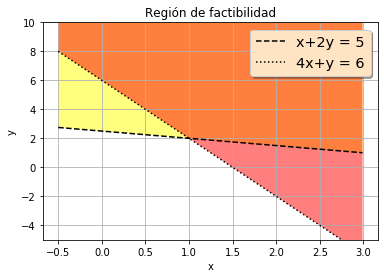

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
x = np.arange(-0.5, 3.0, 0.01)
y1 = (5 - x)/2
y2 = 6 - 4*x

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'k--', label='x+2y = 5')
ax.plot(x, y2, 'k:', label='4x+y = 6')
ax.grid()
ax.set(xlabel='x', ylabel='y',
       title='Región de factibilidad')

ax.fill_between(x, y1, 10, where=(x + 2*y1 >= 5), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y2, 10, where=(4*x + y2 >= 6), facecolor='red', alpha=0.5)

ax.set_ylim((-5, 10))
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('bisque')

plt.show()

Al problema anterior se le conoce como un problema de programación lineal entera debido a que sus restricciones son solo desigualdades o ecuaciones lineales. Y se dice de optimización, pues su función objetivo consiste en minimizar o maximizar una función, se desea que esta sea lineal, pero existen problemas para los cuales no es posible dicha formulación. En este curso nos enfocaremos en problemas de optimización lineal entera o mejor conocidos como problemas ILP o simplemente IP. En general se los conoce como problemas LP (linear programming) si sus restricciones son lineales.

La forma canónica de un problema LP es:

$$
\begin{align*}
    \min c^T x \\
    \mathrm{s.r.}\\
    Ax \leq b \\
    x \geq 0
\end{align*}
$$

__Nota:__ Sin pérdida de generalidad uno puede asumir siempre un problema de minimización. Sin embargo, en ocaciones es preferible resolver el problema de maximización.

Uno puede clasificar los modelos en dos tipos: modelos concretos y modelos abstractos.

__Modelos Concretos:__ Decimos que es concreto si es un problema para un caso particular. Por ejemplo el Problema:
$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$
Es un modelo concreto. No hay parámetros generales.

__Modelos Abstractos:__ Estos son modelos más generales, uno debe definir variables, parámetros, conjuntos, desigualdades, etc. Por ejemplo si escribimos un modelo en su forma canónica, asignando ciertas características a las desigualdades y a las regiones de factibilidad, uno tendría un modelo abstracto. También se los conoce como problemas de la literatura. Por ejemplo, el problema de horarios para universidades tiene un modelo abstracto. Sin embargo, si nosotros aplicamos este modelo a un caso particular de la EPN. Es decir, si solo lo vamos a usar una sola vez para un conjunto de parámetros específicos dejaría de ser un modelo abstracto y se convertiría en concreto.


## Esquema de resolución:

* Identificar el problema -> Preguntarse: que tipo de modelo es..?? -> Lo puedo resolver...?? -> Qué parámetros necesita..??

* Escribir el modelo matemático -> Preguntarse: es posible resolver..?? -> cuál es lenguaje que me conviene...?? Qué solver usaré...??

* Implementar el modelo (Escribir el algoritmo) -> Hacer pruebas computacionales con ejemplos pequeños para comprobar la correcta implementación del problema.

* Presentar los resultados -> Debemos ser capaces de dar una solución al problema de forma que sea comprensible para cualquier persona que tenga dicho problema.

## Problemas que debemos conocer de la programación lineal:

A continuación se describen algunos problemas clásicos de la programación lineal.

1. Problema de la Mochila.
2. Problema del Transporte.
3. Problema de la Dieta.
4. Problema del Agente viajero.
5. Problema de horarios (Planificación de horarios)
6. Problema de costos mínimos (camino más corto)
7. Problema de mezcla de ingredientes.
8. Bin Packing problem (Empaquetamiento)
9. Problema de Coloramiento de Grafos.

## Pasos para escribir el modelo matemático:

1. Identificar los parámetros (si es posible ir escribiendo los conjuntos).
2. Identificar la función objetivo (el problema es minimización de qué..?? ).
3. Identificar las variables para poder escribir dicha función objetivo.
4. Identificar las restricciones del problema (fuertes y débiles).
5. Revisar los parámetros y si es necesario modificarlos.

$$
\begin{array}{lr}
    \min c^T x & \mbox{Función objetivo} \\
    \mathrm{s.r.} & \\
    Ax \leq b & \mbox{Restricciones} \\
    x \geq 0 & \mbox{"Restricciones"}
\end{array}
$$

### Ejemplo: 

Continuando con nuestro primer ejemplo. Crearemos un modelo concreto para resolverlo usando Pyomo.

Problema:
$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$

In [1]:
# Importamos el ambiente de pyomo
from pyomo.environ import *

Ahora, procedemos a definir un modelo concreto usando el comando `ConcreteModel()`. Podemos asignar un nombre a nuestro modelo dandole este como argumento.

In [2]:
# Definicion del modelo
model = ConcreteModel()

En el caso de modelos concretos podemos o no utilizar parametros o conjuntos. En este ejemplo en particular no necesitamos parámetros. 

Pasamos a las variables. Para las variables, utilizamos la clase `Var()`. Podemos especificar como argumento, el tipo de variable, el dominio, etc. En nuestro caso no nos interesa. Debemos crear variables con dominio real. Los tipos de dominios que Pyomo acepta son los siguientes:

* Any = todos los valores posibles
* Reals = valores de tipo float
* PositiveReals = valores de tipo float estrictamente positivos
* NonPositiveReals = valores float no positivos
* NegativeReals = valores float estrictamente negativos
* NonNegativeReals = valores float no negativos
* PercentFraction = valores float en el intervalo $[0,1]$
* UnitInterval = equivalente a usar PercentFraction
* Integers = valores enteros
* PositiveIntegers = valores enteros positivos
* NonPositiveIntegers = valores enteros no positivos
* NegativeIntegers = valores enteros negativos
* NonNegativeIntegers = valores enteros no negativos
* Boolean = Valores booleanos, que se pueden representar como Falso / Verdadero, 0/1, 'Falso' / 'Verdadero' y 'F' / 'T'
* Binary = los enteros $\{0, 1\}$.

Los dominios anteriores, pueden usarse para definir conjuntos y estos a su vez pueden indexarse con las variables. No es nuestro caso. 

Los argumentos de la clase `Var()` son:

* bounds = Una función (u objeto de Python) que define los límites (inferior, superior) para la variable `bounds = (0,1)`.
* domain = Un conjunto que es un superconjunto de los valores que la variable puede tomar.
* initialize = Una función (u objeto Python) que da un valor inicial para la variable; esto es particularmente importante para modelos no lineales `initialize = 1`
* within = equivalente a usar domain.

In [3]:
# Generamos las variables
model.x = Var( within = Reals )
# Cree la variable y usando la estructura para crear x
model.y = Var( within = Reals )

In [5]:
print(f"Primera variable: nombre {model.x.name}, cota inferior (lb) {model.x.lb}, cota superior (ub) {model.x.ub}")
print(f"Segunda variable: nombre {model.y.name}, cota inferior (lb) {model.y.lb}, cota superior (ub) {model.y.ub}")

Primera variable: nombre x, cota inferior (lb) None, cota superior (ub) None
Segunda variable: nombre y, cota inferior (lb) None, cota superior (ub) None


Una vez creadas las variables, procedemos a definir la función objetivo. Utilizamos la clase `Objective()`, como argumentos podemos escribir la expresión de la fución (en el caso de modelos concretos). También podemos modificar el sentido de optimización (por defecto minimizamos).

In [6]:
# Definimos la función objetivo
model.funcion_objetivo = Objective(
    expr = model.x + model.y,
    sense = minimize )

Finalmente escribimos las restricciones del problema, para ello, utilizamos la clase `Constraint()`. Esta clase recibe como argumentos la expresión directa de la desigualdad o igualdad.

In [7]:
# Agregamos las restricciones al modelo
model.restriccion1 = Constraint(expr = model.x + 2*model.y >= 5)

model.restriccion2 = Constraint(expr = 4 * model.x + model.y >= 6)

Visualicemos el modelo: utilizamos la sentencia `pprint()`

In [8]:
model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    funcion_objetivo : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x + y

2 Constraint Declarations
    restriccion1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   5.0 : x + 2*y :  +Inf :   True
    restriccion2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   6.0 : 4*x + y :  +Inf :   True

5 Declarations: x y funcion_objetivo restriccion1 restriccion2


Definimos el solver que vamos a utilizar. En este curso utilizaremos GLPK como solver. Sin embargo, usted es libre de utilizar el solver de su preferencia. Utilizamos la clase `SolverFactory()` para definir el solver

In [9]:
opt = SolverFactory('glpk')

Ahora, ya podemos resolver el modelo, para ello usamos la función `solve()` perteneciente a la clase `SolverFactory()` y como solver usaremos GLPK.

In [10]:
resultado = opt.solve(model, tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ADmin\AppData\Local\Temp\tmpk7anflnm.glpk.raw --wglp C:\Users\ADmin\AppData\Local\Temp\tmpunzo3wt7.glpk.glp
 --cpxlp C:\Users\ADmin\AppData\Local\Temp\tmpue_l2pri.pyomo.lp
Reading problem data from 'C:\Users\ADmin\AppData\Local\Temp\tmpue_l2pri.pyomo.lp'...
3 rows, 3 columns, 5 non-zeros
26 lines were read
Writing problem data to 'C:\Users\ADmin\AppData\Local\Temp\tmpunzo3wt7.glpk.glp'...
21 lines were written
GLPK Simplex Optimizer, v4.65
3 rows, 3 columns, 5 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  4.000e+00  ratio =  4.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
      0: obj =   0.000000000e+00 inf =   1.100e+01 (2)
      2: obj =   3.000000000e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (36964 bytes)
Writing basic 

La impresión anterior es muy díficil de entender...?? Usamos `write()` para una mejor visualización.

In [11]:
resultado.write(num = 1)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 3.0
  Upper bound: 3.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.6244182586669922
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------------

El mensaje anterior es interesante para experimentos numéricos. Pero para la presentación de resultados al usuario no es de gran ayuda. Usamos la función `display()` perteneciente a la clase `model` para poder ver esta información.

In [12]:
model.display()

Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   1.0 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   2.0 :  None : False : False :  Reals

  Objectives:
    funcion_objetivo : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :   3.0

  Constraints:
    restriccion1 : Size=1
        Key  : Lower : Body : Upper
        None :   5.0 :  5.0 :  None
    restriccion2 : Size=1
        Key  : Lower : Body : Upper
        None :   6.0 :  6.0 :  None


In [13]:
# Tambien podemos usar pprint()
model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   1.0 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   2.0 :  None : False : False :  Reals

1 Objective Declarations
    funcion_objetivo : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x + y

2 Constraint Declarations
    restriccion1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   5.0 : x + 2*y :  +Inf :   True
    restriccion2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   6.0 : 4*x + y :  +Inf :   True

5 Declarations: x y funcion_objetivo restriccion1 restriccion2


In [14]:
# Visualicemos los valores de las variables
#
print(f"Primera variable: nombre {model.x.name}, valor: {model.x.value}")
print(f"Segunda variable: nombre {model.y.name}, valor: {model.y.value}")

Primera variable: nombre x, valor: 1.0
Segunda variable: nombre y, valor: 2.0


In [15]:
# Otra forma de visualizar las variables
for v in model.component_data_objects(Var):
    print('{} = {}'.format(str(v), v.value))

x = 1.0
y = 2.0


In [16]:
# Visualicemos el valor de la funcion objetivo
print(f"Función Objetivo: nombre {model.funcion_objetivo.name}, valor: {value(model.funcion_objetivo)}")

Función Objetivo: nombre funcion_objetivo, valor: 3.0
